# **Credit Card Payment Prediction Using Ensemble Models**

In [ ]:
#required imports
import numpy as np
import pandas as pd

In [ ]:
#loading the data
dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls")
dataset.columns = dataset.iloc[0]
dataset = dataset[1:]
dataset.drop('ID', axis=1, inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [ ]:
dataset

0     LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5  ...  \
0         20000   2         2        1  24     2     2    -1    -1    -2  ...   
1        120000   2         2        2  26    -1     2     0     0     0  ...   
2         90000   2         2        2  34     0     0     0     0     0  ...   
3         50000   2         2        1  37     0     0     0     0     0  ...   
4         50000   1         2        1  57    -1     0    -1     0     0  ...   
...         ...  ..       ...      ...  ..   ...   ...   ...   ...   ...  ...   
29995    220000   1         3        1  39     0     0     0     0     0  ...   
29996    150000   1         3        2  43    -1    -1    -1    -1     0  ...   
29997     30000   1         2        2  37     4     3     2    -1     0  ...   
29998     80000   1         3        1  41     1    -1     0     0     0  ...   
29999     50000   1         2        1  46     0     0     0     0     0  ...   

0     BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4  \
0             0         0         0        0      689        0        0   
1          3272      3455      3261        0     1000     1000     1000   
2         14331     14948     15549     1518     1500     1000     1000   
3         28314     28959     29547     2000     2019     1200     1100   
4         20940     19146     19131     2000    36681    10000     9000   
...         ...       ...       ...      ...      ...      ...      ...   
29995     88004     31237     15980     8500    20000     5003     3047   
29996      8979      5190         0     1837     3526     8998      129   
29997     20878     20582     19357        0        0    22000     4200   
29998     52774     11855     48944    85900     3409     1178     1926   
29999     36535     32428     15313     2078     1800     1430     1000   

0     PAY_AMT5 PAY_AMT6 default payment next month  
0            0        0                          1  
1            0     2000                          1  
2         1000     5000                          0  
3         1069     1000                          0  
4          689      679                          0  
...        ...      ...                        ...  
29995     5000     1000                          0  
29996        0        0                          0  
29997     2000     3100                          1  
29998    52964     1804                          1  
29999     1000     1000                          1  

[30000 rows x 24 columns]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

## Build a classifier by using decision tree and calculate the confusion matrix. Try different hyper-parameters (at least two) and discuss the result.

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import SVG
from graphviz import Source
from sklearn import tree
from scipy import stats

df = dataset.copy()

X = df.drop('default payment next month', axis=1)
y = df['default payment next month'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
feature_names = X.columns
class_names = 'default payment next month'

In [ ]:
# Model 1: Decision Tree with default hyperparameter
dt_1 = DecisionTreeClassifier(random_state=42)
dt_1.fit(X_train, y_train)

# Visualize the tree
graph = Source(tree.export_graphviz(dt_1, out_file=None,feature_names=X.columns,
        class_names='default payment next month', filled = True))
display(SVG(graph.pipe(format='svg')))

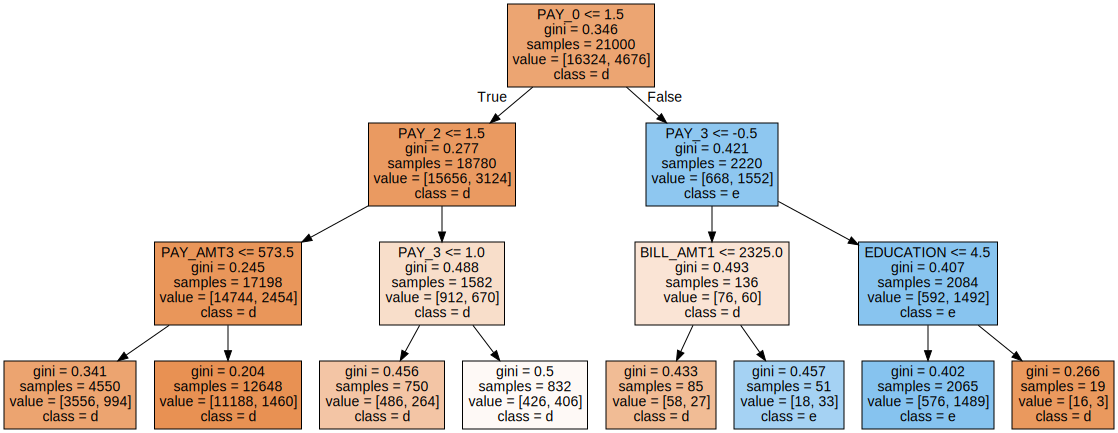

In [ ]:
# Model 2: Decision Tree with max_depth = 3 and criterion = 'gini'
dt_2 = DecisionTreeClassifier(max_depth=3, criterion='gini')
dt_2.fit(X_train, y_train)

# Visualize the tree
graph = Source(tree.export_graphviz(dt_2, out_file=None,feature_names=X.columns,
        class_names='default payment next month', filled = True))
display(SVG(graph.pipe(format='svg')))

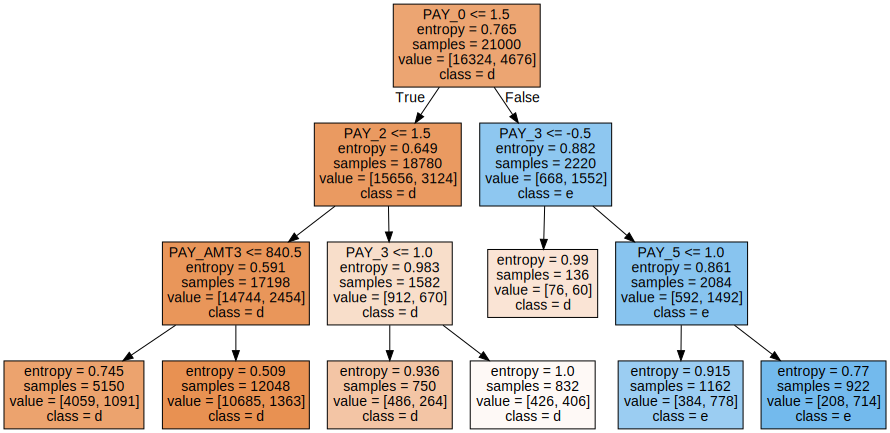

In [ ]:
# Model 3: Decision Tree with max_depth=3, min_samples_leaf = 100, criterion='entropy'
dt_3 = DecisionTreeClassifier(max_depth=3, min_samples_leaf = 100, criterion='entropy')
dt_3.fit(X_train, y_train)

# Visualize the tree
graph = Source(tree.export_graphviz(dt_3, out_file=None,feature_names=X.columns,
        class_names='default payment next month', filled = True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
# Predictions
y_pred_1 = dt_1.predict(X_test)
y_pred_2 = dt_2.predict(X_test)
y_pred_3 = dt_3.predict(X_test)

# Confusion matrices
cm_1 = confusion_matrix(y_test, y_pred_1)
cm_2 = confusion_matrix(y_test, y_pred_2)
cm_3 = confusion_matrix(y_test, y_pred_3)

print("Confusion Matrix - Model 1:\n", cm_1)
print("Confusion Matrix - Model 2:\n", cm_2)
print("Confusion Matrix - Model 3:\n", cm_3)

# Classification reports
print("\nClassification Report - Model 1:\n", classification_report(y_test, y_pred_1))
print("\nClassification Report - Model 2:\n", classification_report(y_test, y_pred_2))
print("\nClassification Report - Model 3:\n", classification_report(y_test, y_pred_3))

Confusion Matrix - Model 1:
 [[5712 1328]
 [1140  820]]
Confusion Matrix - Model 2:
 [[6779  261]
 [1353  607]]
Confusion Matrix - Model 3:
 [[6782  258]
 [1362  598]]

Classification Report - Model 1:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      7040
           1       0.38      0.42      0.40      1960

    accuracy                           0.73      9000
   macro avg       0.61      0.61      0.61      9000
weighted avg       0.74      0.73      0.73      9000


Classification Report - Model 2:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      7040
           1       0.70      0.31      0.43      1960

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000


Classification Report - Model 3:
               precision    recall  f1-score   support

           0      

#### **Results Evaluation:**
 - Model 1:
  - Lower overall accuracy (73%).
  - Higher recall for class '1', potentially better for applications where missing positive cases is costly.
  - Lower precision for class '1', leading to more false positives.
 - Model 2:
  - Significantly higher overall accuracy (82%).
  - High precision and recall for class '0', indicating excellent performance on the negative class.
  - Lower recall for class '1', with only 31% of actual positives being identified.
  - Precision for class '1' is high but is based on a small number of positive predictions.
 - Model 3:
  - Similar overall accuracy to Model 2 (82%).
  - Almost identical precision and recall rates for both classes as Model 2, with marginally different confusion matrix values.
  - Slightly worse at detecting true positives (class '1') compared to Model 2.

**Conclusion:**

The increase in overall accuracy from Model 1 to Models 2 and 3 suggests that adjustments in max_depth and min_samples_leaf parameters have contributed to a better generalization on the test set. Models 2 and 3 are almost identical in performance, implying that the min_samples_leaf parameter set in Model 3 does not significantly affect the performance given the max_depth is the same in both models.

## Try to build the decision tree which you built for the previous step, but this time by RandomizedSearchCV over hyper-parameters. Compare the results.

In [ ]:
# YOUR CODE HERE

from sklearn.model_selection import RandomizedSearchCV

# Define a grid of hyperparameters
param_dist = {
    "max_depth": [3, None],
    "max_features": np.arange(1, len(X.columns)+1),
    "min_samples_leaf": np.arange(1, 10),
    "criterion": ["gini", "entropy"]
}

# Create a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:\n", best_params, "\n")

# Best model from RandomizedSearch
best_dt = random_search.best_estimator_

# Predictions
y_pred = best_dt.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters:
 {'min_samples_leaf': 7, 'max_features': 19, 'max_depth': 3, 'criterion': 'gini'} 

Confusion Matrix:
 [[6779  261]
 [1353  607]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      7040
           1       0.70      0.31      0.43      1960

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000



**Results Evaluation:**

- Shares the same overall accuracy (82%) as Models 2 and 3.
- Confusion matrix is identical to Model 2's, suggesting similar performance.
- Classification report metrics are identical to those of Models 2 and 3, indicating no observable performance difference in the test set.

## Try to build the same classifier by using following ensemble models. For each of these models calculate accuracy and at least for two in the list below, plot the learning curves.

* Random Forest
* AdaBoost
* Extra Trees Classifier
* Gradient Boosted Trees


In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

rf = RandomForestClassifier(min_samples_leaf = 7, max_features = 19, max_depth = 3, criterion = 'gini', random_state=42)
ab = AdaBoostClassifier(random_state=42)
etc = ExtraTreesClassifier(min_samples_leaf = 7, max_features = 19, max_depth = 3, criterion = 'gini', random_state=42)
gbt = GradientBoostingClassifier(min_samples_leaf = 7, max_features = 19, max_depth = 3, random_state=42)

# Train models
rf.fit(X_train, y_train)
ab.fit(X_train, y_train)
etc.fit(X_train, y_train)
gbt.fit(X_train, y_train)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
ab_accuracy = accuracy_score(y_test, ab.predict(X_test))
etc_accuracy = accuracy_score(y_test, etc.predict(X_test))
gbt_accuracy = accuracy_score(y_test, gbt.predict(X_test))

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"AdaBoost Accuracy: {ab_accuracy}")
print(f"Extra Trees Classifier Accuracy: {etc_accuracy}")
print(f"Gradient Boosted Trees Accuracy: {gbt_accuracy}")

Random Forest Accuracy: 0.8215555555555556
AdaBoost Accuracy: 0.8168888888888889
Extra Trees Classifier Accuracy: 0.8114444444444444
Gradient Boosted Trees Accuracy: 0.8198888888888889


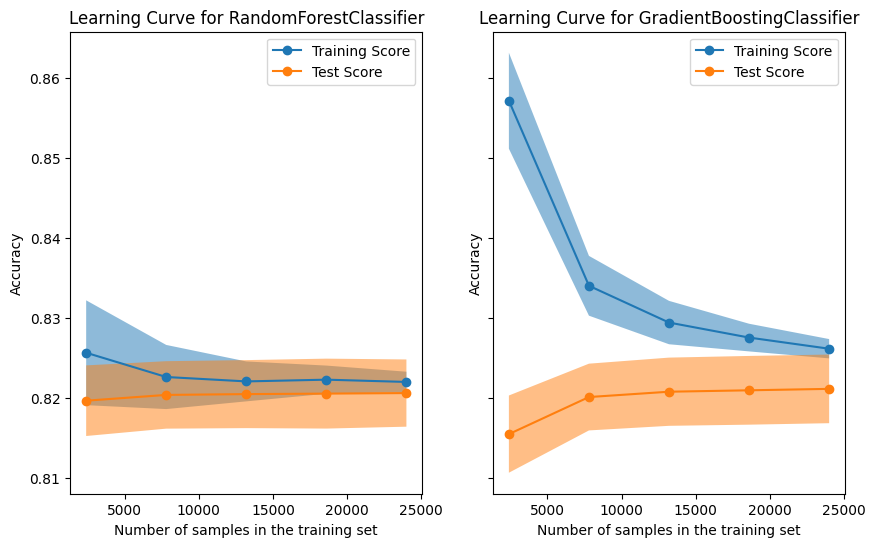

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=42),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([rf, gbt]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

## Discuss and compare the results:

* How does changing hyperparms effect model performance?

  - Hyperparameters like max_depth, min_samples_leaf, max_features, and criterion can significantly affect the performance of models by controlling model complexity, preventing overfitting, and influencing how the models make splits or combine learners.

* Why do you think certain models performed better/worse?

  - Ensemble methods like Random Forest and Gradient Boosting should perform better due to their complex structures that combine multiple trees, which can capture more nuances in the data. This reduces the variance part of the error.

  - Single decision trees often perform worse because they have a high variance and low bias. While they can be tuned using RandomizedSearchCV, their simplicity limits their performance on complex datasets where interactions between features are important.

* How does this performance line up with known strengths/weakness of these models?

  - Observing the learning curve of the RandomForestClassifier, we see that it plateaus at a high level of accuracy, regardless of increasing sample sizes. This suggests that the model is robust against overfitting, a common trait of Random Forests due to their built-in mechanism for averaging multiple decision trees.

  - In contrast, the learning curve for the GradientBoostingClassifier displays a high variance at smaller sample sizes, indicative of overfitting. However, as we introduce more data, the test accuracy improves, converging towards the training score. This behavior is expected for gradient boosting models, which tend to learn progressively and deeply from the residual errors of the preceding trees, hence the initial overfitting which diminishes with more data and appropriate regularization.

  - When we compare the performance of these ensemble techniques to that of a singular decision tree, the ensemble models outperform the latter. This superiority is attributed to their ability to amalgamate the outputs from numerous decision trees, thereby enhancing the overall predictive power and stability of the model by reducing both bias and variance - a core advantage of ensemble methods.